In [1]:

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.manifold import TSNE

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Carregando os dados
df = pd.read_csv('versao_2_spotify_songs.csv')

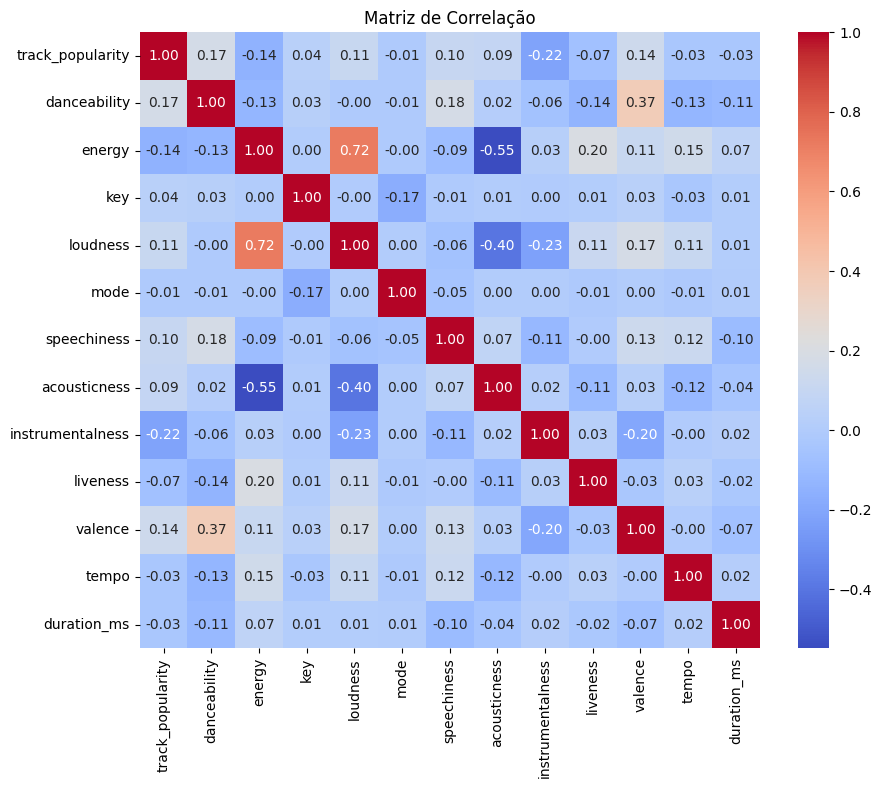

In [6]:
# Exibindo a matriz de correlação em um heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()

## Popularidade Média por Classe de Popularidade:

In [3]:
def classify_popularity(popularity):
    if popularity <= 20:
        return 0
    elif popularity <= 40:
        return 1
    elif popularity <= 60:
        return 2
    else:
        return 3

df['popularity_class'] = df['track_popularity'].apply(classify_popularity)

In [4]:
# Calculando a média da popularidade por classe de popularidade
media_popularidade = df.groupby('popularity_class')['track_popularity'].mean()
print(media_popularidade)

popularity_class
0    11.967611
1    32.606478
2    50.322302
3    74.271597
Name: track_popularity, dtype: float64


### Descrição do Dataset

#### Shape Atual do Dataset:
- Após a limpeza de dados, o dataset agora possui dimensões (9864, 16).

#### Colunas Restantes:
1. **track_popularity:**
   - Descrição: Indica a popularidade da música em uma escala de 0 a 100, onde valores mais altos indicam maior popularidade.

2. **playlist_genre:**
   - Descrição: Gênero da playlist à qual a música pertence.

3. **playlist_subgenre:**
   - Descrição: Subgênero da playlist.

4. **danceability:**
   - Descrição: Medida que descreve o quão adequada é uma música para dançar, baseada em elementos como ritmo e batida.

5. **energy:**
   - Descrição: Medida de intensidade e atividade de uma música em uma escala de 0.0 a 1.0.

6. **key:**
   - Descrição: Estimativa da tonalidade geral da música, representada por inteiros mapeados usando notação padrão de classes de tonalidade.

7. **loudness:**
   - Descrição: Volume geral de uma música em decibéis (dB).

8. **mode:**
   - Descrição: Indica a modalidade (maior ou menor) de uma música.

9. **speechiness:**
   - Descrição: Detecta a presença de palavras faladas em uma música.

10. **acousticness:**
    - Descrição: Medida de confiança de 0.0 a 1.0 se a música é acústica.

11. **instrumentalness:**
    - Descrição: Prevê se uma música contém ou não vocais.

12. **liveness:**
    - Descrição: Detecta a presença de uma plateia na gravação de uma música.

13. **valence:**
    - Descrição: Medida de positividade musical de uma faixa em uma escala de 0.0 a 1.0.

14. **tempo:**
    - Descrição: Estimativa geral do tempo de uma música em batidas por minuto (BPM).

15. **duration_ms:**
    - Descrição: Duração da música em milissegundos.

16. **popularity_class:**
    - Descrição: Classe de popularidade atribuída à música (0, 1, 2 ou 3).


#### Média da Popularidade por Classe:
- Classe 0: 11.97
- Classe 1: 32.61
- Classe 2: 50.32
- Classe 3: 74.27

#### Correlações entre Features Numéricas e 'track_popularity':

- **danceability:** 0.166
- **energy:** -0.145
- **key:** 0.036
- **loudness:** 0.107
- **mode:** -0.005
- **speechiness:** 0.099
- **acousticness:** 0.088
- **instrumentalness:** -0.216
- **liveness:** -0.068
- **valence:** 0.138
- **tempo:** -0.034

## Features numéricas com suas estatísticas:

#### track_popularity

| Estatística       | Valor   |
|-------------------|---------|
| Média             | 51.01   |
| Desvio Padrão     | 20.83   |
| Mínimo            | 0       |
| 25%               | 37      |
| 50%               | 50      |
| 75%               | 66      |
| Máximo            | 100     |

#### danceability

| Estatística       | Valor   |
|-------------------|---------|
| Média             | 0.677   |
| Desvio Padrão     | 0.136   |
| Mínimo            | 0.077   |
| 25%               | 0.592   |
| 50%               | 0.691   |
| 75%               | 0.775   |
| Máximo            | 0.979   |

#### energy

| Estatística       | Valor   |
|-------------------|---------|
| Média             | 0.695   |
| Desvio Padrão     | 0.178   |
| Mínimo            | 0.0167  |
| 25%               | 0.58    |
| 50%               | 0.712   |
| 75%               | 0.831   |
| Máximo            | 1       |

#### key

| Estatística       | Valor   |
|-------------------|---------|
| Média             | 5.38    |
| Desvio Padrão     | 3.64    |
| Mínimo            | 0       |
| 25%               | 2       |
| 50%               | 6       |
| 75%               | 9       |
| Máximo            | 11      |

#### loudness

| Estatística       | Valor    |
|-------------------|----------|
| Média             | -6.33    |
| Desvio Padrão     | 2.76     |
| Mínimo            | -26.207  |
| 25%               | -7.614   |
| 50%               | -5.8585  |
| 75%               | -4.458   |
| Máximo            | 0.326    |

#### mode

| Estatística       | Valor   |
|-------------------|---------|
| Média             | 0.54    |
| Desvio Padrão     | 0.50    |
| Mínimo            | 0       |
| 25%               | 0       |
| 50%               | 1       |
| 75%               | 1       |
| Máximo            | 1       |

#### speechiness

| Estatística       | Valor   |
|-------------------|---------|
| Média             | 0.114   |
| Desvio Padrão     | 0.101   |
| Mínimo            | 0.023   |
| 25%               | 0.045   |
| 50%               | 0.072   |
| 75%               | 0.146   |
| Máximo            | 0.877   |

#### acousticness

| Estatística       | Valor   |
|-------------------|---------|
| Média             | 0.191   |
| Desvio Padrão     | 0.225   |
| Mínimo            | 0.000001|
| 25%               | 0.0189  |
| 50%               | 0.101   |
| 75%               | 0.288   |
| Máximo            | 0.986   |

#### instrumentalness

| Estatística       | Valor   |
|-------------------|---------|
| Média             | 0.095   |
| Desvio Padrão     | 0.239   |
| Mínimo            | 0       |
| 25%               | 0       |
| 50%               | 0.000009|
| 75%               | 0.00432 |
| Máximo            | 0.994   |

#### liveness

| Estatística       | Valor   |
|-------------------|---------|
| Média             | 0.185   |
| Desvio Padrão     | 0.147   |
| Mínimo            | 0.0131  |
| 25%               | 0.0953  |
| 50%               | 0.125   |
| 75%               | 0.231   |
| Máximo            | 0.979   |

#### valence

| Estatística       | Valor   |
|-------------------|---------|
| Média             | 0.481   |
| Desvio Padrão     | 0.226   |
| Mínimo            | 0.00001 |
| 25%               | 0.307   |
| 50%               | 0.478   |
| 75%               | 0.654   |
| Máximo            | 0.981   |

#### tempo

| Estatística       | Valor    |
|-------------------|----------|
| Média             | 122.28   |
| Desvio Padrão     | 26.69    |
| Mínimo            | 35.48    |
| 25%               | 100.38   |
| 50%               | 123.95   |
| 75%               | 135.82   |
| Máximo            | 219.99   |

#### duration_ms

| Estatística       | Valor      |
|-------------------|------------|
| Média             | 197699.04  |
| Desvio Padrão     | 44754.76   |
| Mínimo            | 54656      |
| 25%               | 170057.5   |
| 50%               | 192839     |
| 75%               | 218182     |
| Máximo            | 515703     |

#### popularity_class

| Estatística       | Valor   |
|-------------------|---------|
| Média             | 1.93    |
| Desvio Padrão     | 0.94    |
| Mínimo            | 0       |
| 25%               | 1       |
| 50%               | 2       |
| 75%               | 3       |
| Máximo            | 3       |



### Normalização de Dados:


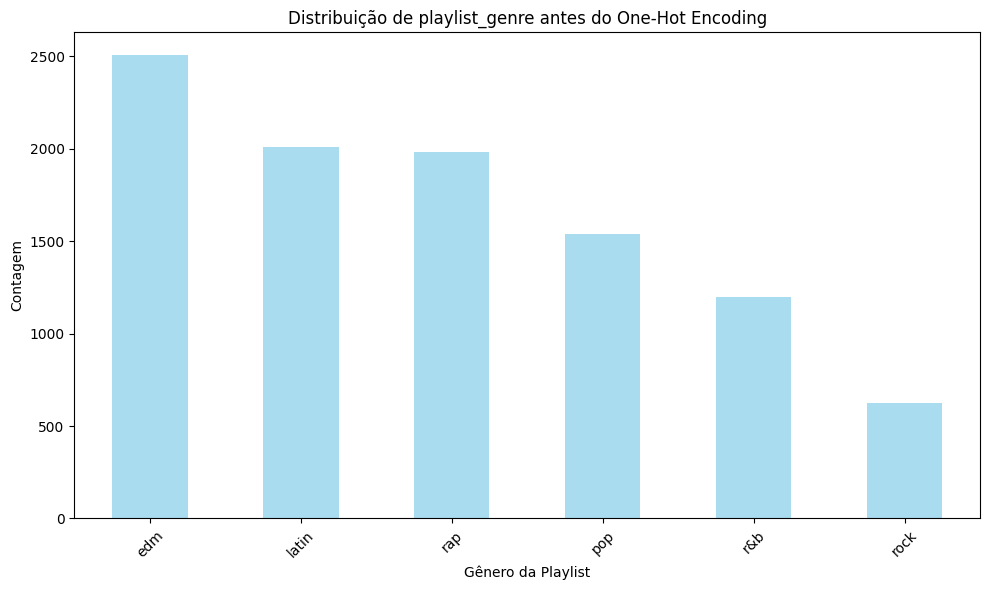

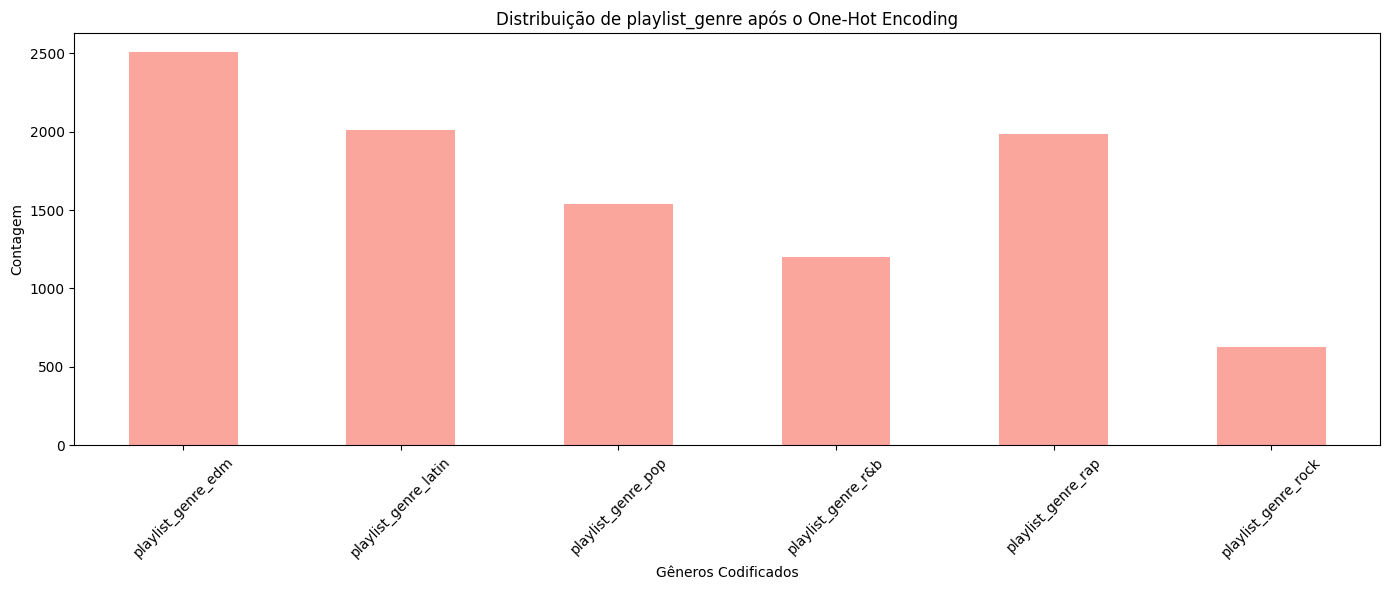

In [5]:
# Plot antes da codificação
plt.figure(figsize=(10, 6))
df['playlist_genre'].value_counts().plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('Distribuição de playlist_genre antes do One-Hot Encoding')
plt.xlabel('Gênero da Playlist')
plt.ylabel('Contagem')
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor visualização
plt.tight_layout()  # Melhora a disposição dos elementos no gráfico
plt.show()

# Aplicando o One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=['playlist_genre', 'playlist_subgenre'])

# Plot depois da codificação
plt.figure(figsize=(14, 6))
df_encoded.filter(regex='playlist_genre_').sum().plot(kind='bar', color='salmon', alpha=0.7)
plt.title('Distribuição de playlist_genre após o One-Hot Encoding')
plt.xlabel('Gêneros Codificados')
plt.ylabel('Contagem')
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor visualização
plt.tight_layout()  # Melhora a disposição dos elementos no gráfico
plt.show()


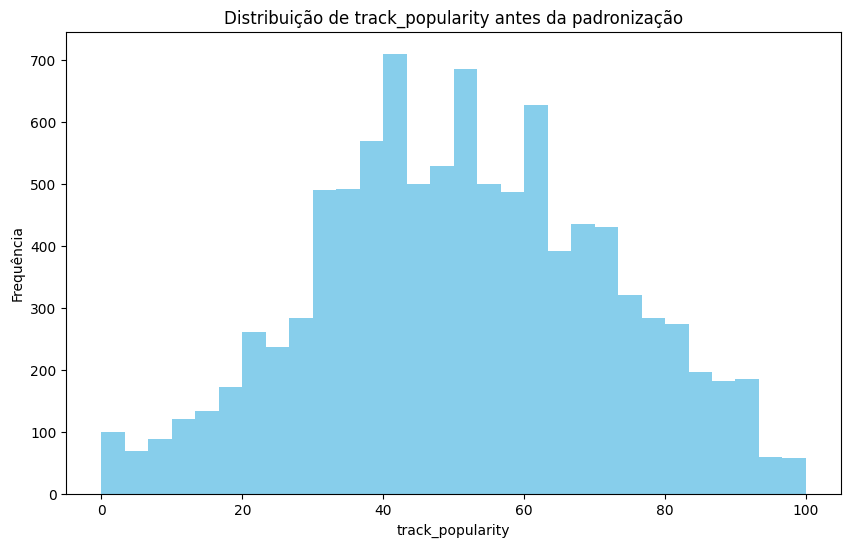

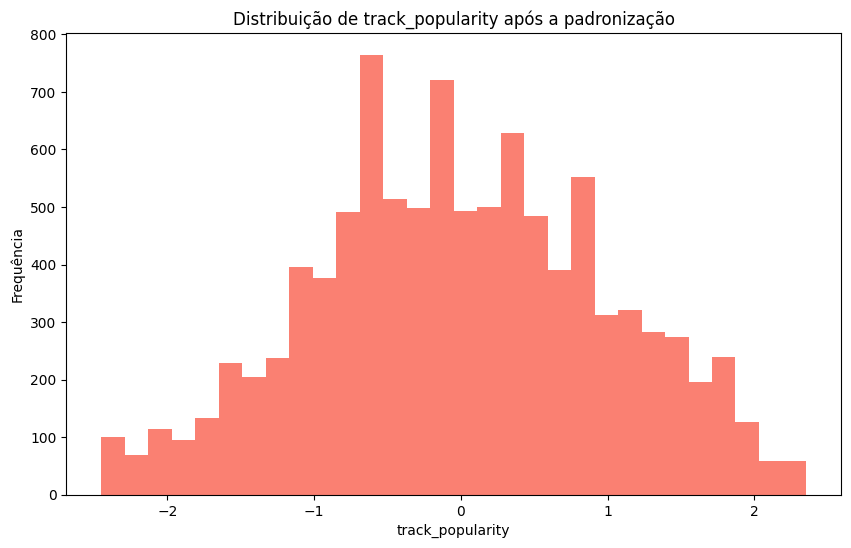

In [6]:
# Plot antes da padronização
plt.figure(figsize=(10, 6))
df['track_popularity'].plot(kind='hist', bins=30, color='skyblue')
plt.title('Distribuição de track_popularity antes da padronização')
plt.xlabel('track_popularity')
plt.ylabel('Frequência')
plt.show()

# Aplicando a padronização somente nas colunas numéricas
colunas_numericas = ['track_popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
                     'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

scaler = StandardScaler()
df_scaler = df_encoded.copy()  # Faz uma cópia dos df codificados para manter a original
df_scaler[colunas_numericas] = scaler.fit_transform(df_scaler[colunas_numericas])

# Plot depois da padronização
plt.figure(figsize=(10, 6))
df_scaler['track_popularity'].plot(kind='hist', bins=30, color='salmon')
plt.title('Distribuição de track_popularity após a padronização')
plt.xlabel('track_popularity')
plt.ylabel('Frequência')
plt.show()


### Remoção de Outliers:

In [12]:
colunas_numericas = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
                   'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']


from scipy import stats

# Calcula z-score para cada coluna numérica
z_scores = stats.zscore(df[colunas_numericas])

# Define um limite de z-score para considerar outliers (exemplo: 3)
limite_z_score = 3

# Encontra índices dos outliers em cada coluna
outliers_indices = (np.abs(z_scores) > limite_z_score).any(axis=1)

# Remove os outliers
dados_sem_outliers = df[~outliers_indices]

### Redução de Dimensionalidade 

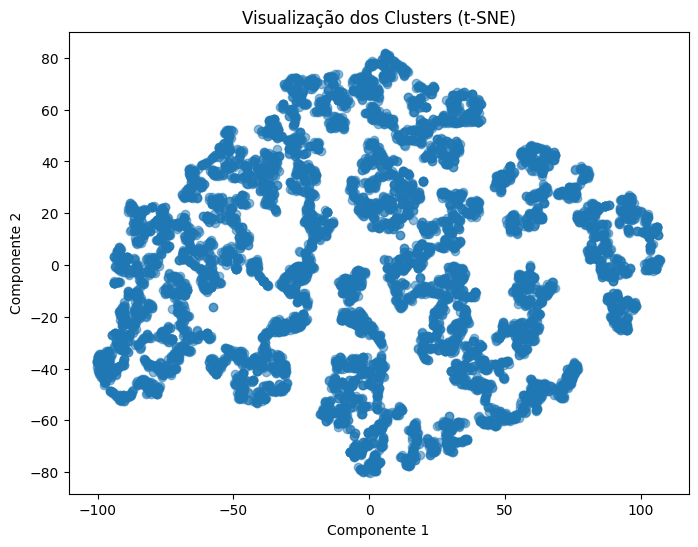

In [14]:
# Seleciona apenas as colunas numéricas após o pré-processamento
colunas_numericas = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
                     'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Cria um novo DataFrame apenas com as colunas numéricas
dados_numericos = dados_sem_outliers[colunas_numericas]

# Redução de dimensionalidade usando t-SNE
tsne = TSNE(n_components=2, random_state=42)
dados_tsne = tsne.fit_transform(dados_numericos)

# Visualização dos clusters resultantes
plt.figure(figsize=(8, 6))
plt.scatter(dados_tsne[:, 0], dados_tsne[:, 1], alpha=0.5)
plt.title('Visualização dos Clusters (t-SNE)')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.show()

### Experimentação com Parâmetros do DBSCAN:

In [18]:
from sklearn.cluster import DBSCAN

# Selecionando as colunas numéricas após o pré-processamento
colunas_numericas = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
                     'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Criando um novo DataFrame apenas com as colunas numéricas após o pré-processamento
dados_numericos = dados_sem_outliers[colunas_numericas]

# Configuração do DBSCAN
eps_value = 3  # Valor inicial para o eps
min_samples_value = 5  # Valor inicial para o min_samples

# Aplicando o DBSCAN
dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
clusters = dbscan.fit_predict(dados_numericos)


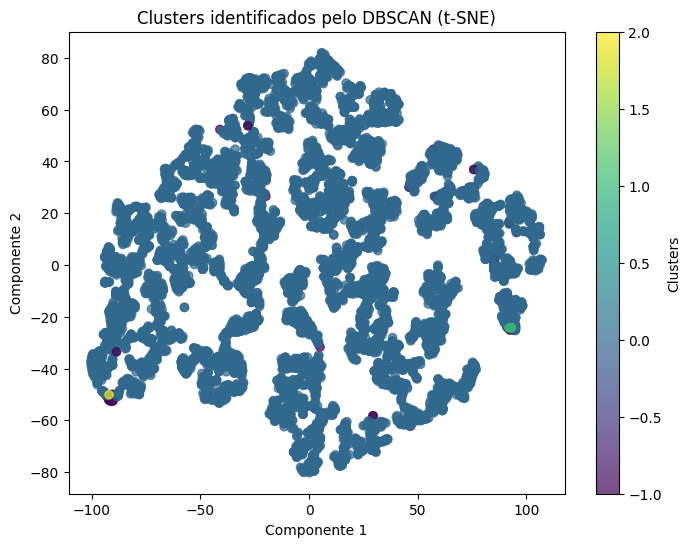

In [19]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Redução de dimensionalidade usando t-SNE nos dados após o DBSCAN
tsne = TSNE(n_components=2, random_state=42)
dados_tsne = tsne.fit_transform(dados_numericos)

# Plot dos clusters identificados pelo DBSCAN
plt.figure(figsize=(8, 6))
plt.scatter(dados_tsne[:, 0], dados_tsne[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.title('Clusters identificados pelo DBSCAN (t-SNE)')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.colorbar(label='Clusters')
plt.show()


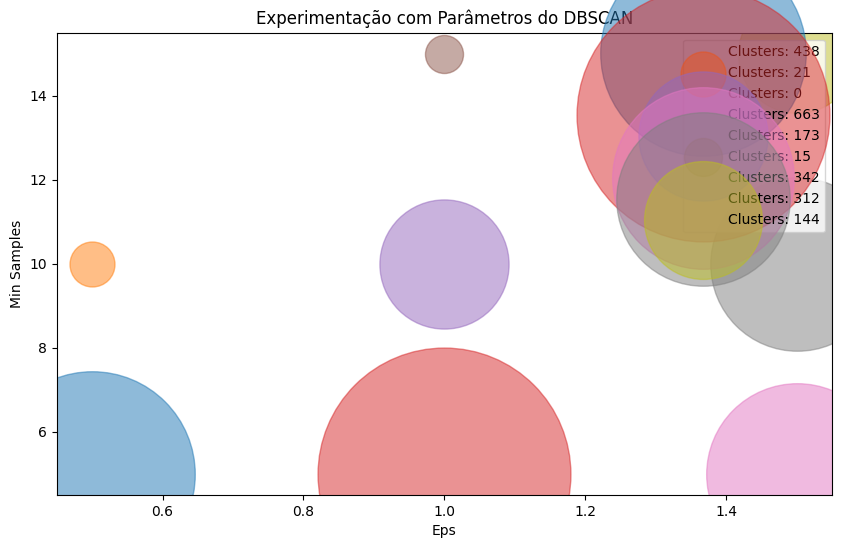

In [20]:
def experimentar_DBSCAN(eps_values, min_samples_values, dados):
    resultados = {}

    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(dados)
            n_clusters = len(np.unique(labels)) - 1  # Ignora o rótulo -1 (outliers)
            resultados[(eps, min_samples)] = n_clusters

    # Gráfico comparativo
    plt.figure(figsize=(10, 6))
    for (eps, min_samples), clusters in resultados.items():
        plt.scatter(
            eps, min_samples, s=clusters * 50, alpha=0.5, label=f"Clusters: {clusters}"
        )

    plt.title("Experimentação com Parâmetros do DBSCAN")
    plt.xlabel("Eps")
    plt.ylabel("Min Samples")
    plt.legend()
    plt.show()


# Chamada da função de experimentação
eps_values = [0.5, 1.0, 1.5]
min_samples_values = [5, 10, 15]
experimentar_DBSCAN(eps_values, min_samples_values, dados_tsne)

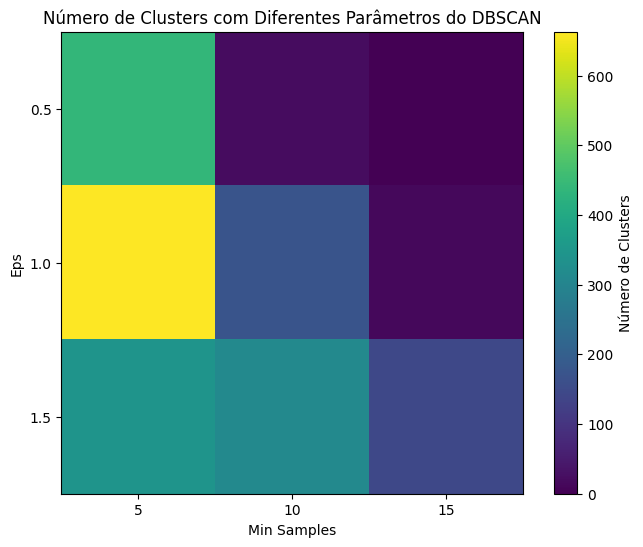

In [21]:
def experimentar_DBSCAN(eps_values, min_samples_values, dados):
    resultados = {}

    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(dados)
            n_clusters = len(np.unique(labels)) - 1  # Ignora o rótulo -1 (outliers)
            resultados[(eps, min_samples)] = n_clusters

    # Preparação dos dados para o mapa de calor
    n_clusters_array = np.zeros((len(eps_values), len(min_samples_values)))
    for i, eps in enumerate(eps_values):
        for j, min_samples in enumerate(min_samples_values):
            n_clusters_array[i, j] = resultados[(eps, min_samples)]

    # Criação do mapa de calor
    plt.figure(figsize=(8, 6))
    plt.imshow(n_clusters_array, cmap="viridis", interpolation="nearest")
    plt.colorbar(label="Número de Clusters")
    plt.xticks(np.arange(len(min_samples_values)), min_samples_values)
    plt.yticks(np.arange(len(eps_values)), eps_values)
    plt.xlabel("Min Samples")
    plt.ylabel("Eps")
    plt.title("Número de Clusters com Diferentes Parâmetros do DBSCAN")
    plt.show()


# Chamada da função de experimentação
eps_values = [0.5, 1.0, 1.5]
min_samples_values = [5, 10, 15]
experimentar_DBSCAN(eps_values, min_samples_values, dados_tsne)